In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
from sklearn.metrics import roc_curve, auc

In [4]:
df = pd.read_csv("hmeq_SMOTE.csv")

In [6]:
df.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self,TARGET
0,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.000000,34.818262,1,0,1,0,0,0,1
1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.000000,34.818262,1,0,1,0,0,0,1
2,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.000000,34.818262,1,0,1,0,0,0,1
3,1500,65019.0,89235.5,7.0,0.0,0.0,173.466667,0.0,21.296096,34.818262,0,0,1,0,0,0,1
4,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.000000,34.818262,1,1,0,0,0,0,0


In [10]:
# train_test split
X = df.drop('TARGET', axis=1)

In [12]:
y = df['TARGET']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
scaler = StandardScaler()

In [24]:
knn = KNeighborsClassifier()

In [26]:
operations = [('scaler',scaler), ('knn',knn)]

In [28]:
pipe = Pipeline(operations)

In [30]:
k_values = list(range(1,30))

In [32]:
param_grid = {'knn__n_neighbors':k_values}

In [34]:
full_cv_classfier = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

In [36]:
full_cv_classfier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [38]:
full_cv_classfier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [40]:
full_pred = full_cv_classfier.predict(X_test)

In [42]:
print(classification_report(y_test,full_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1419
           1       0.99      0.94      0.97      1444

    accuracy                           0.97      2863
   macro avg       0.97      0.97      0.97      2863
weighted avg       0.97      0.97      0.97      2863



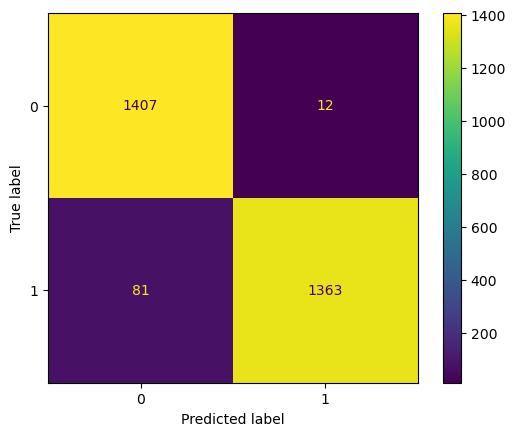

In [46]:
ConfusionMatrixDisplay.from_predictions(y_test, full_pred)

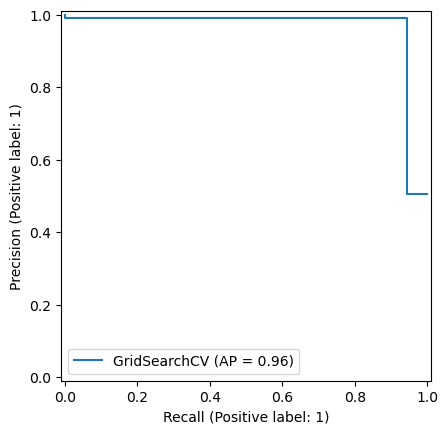

In [50]:
PrecisionRecallDisplay.from_estimator(full_cv_classfier, X_test, y_test)

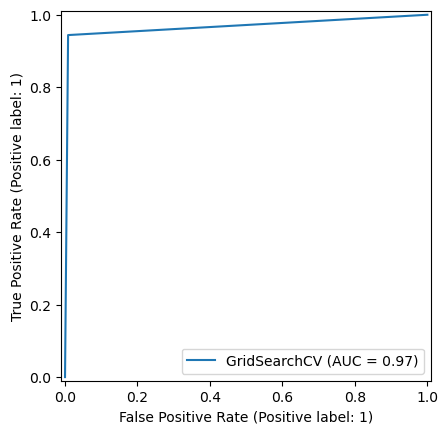

In [52]:
RocCurveDisplay.from_estimator(full_cv_classfier, X_test, y_test)